In [1]:
# 3.1 - REPRODUIRE LES ETAPES 2-4 DU CHAPITRE 2

import pandas as pd
import numpy as np
customer = pd.read_csv("Customer.csv")

In [2]:
#Examination des 5 premières lignes
customer.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
0,41.0,6.0,28.0,Fem,False,4.0,China,113
1,34.0,4.0,15.5,Fem,True,2.0,China,36
2,38.0,5.0,?,Fem,False,7.0,China,111
3,20.0,1.0,44.0,Fem,False,2.0,China,71
4,39.0,10.0,10.0,Fem,True,4.0,China,80


In [3]:
#Description des données
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           10000 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB


In [4]:
#Obtenir la liste des modalités d'une variable
customer['country'].value_counts()

country
China             200
Morocco           200
Ukraine           200
Tanzania          200
Kenya             200
Argentina         200
Algeria           200
Poland            200
Sudan             200
Uganda            200
Canada            200
Iraq              200
Peru              200
India             200
Uzbekistan        200
Malaysia          200
Saudi Arabia      200
Venezuela         200
Nepal             200
Afghanistan       200
Yemen             200
Ghana             200
Mozambique        200
Australia         200
Spain             200
Colombia          200
South Korea       200
South Africa      200
United States     200
Indonesia         200
Brazil            200
Pakistan          200
Nigeria           200
Bangladesh        200
Russia            200
Japan             200
Mexico            200
Philippines       200
Vietnam           200
Ethiopia          200
Egypt             200
Germany           200
Iran              200
Turkey            200
Thailand          200
Fr

In [5]:
#Récapitulatif des variables numériques
customer.describe()

,age,pages,News_click
count,10000.000000,10000.000000,10000.000000
mean,37.431400,5.995000,4.412000
std,9.490474,2.438559,2.418231
min,18.000000,1.000000,0.000000
25%,31.000000,5.000000,3.000000
50%,37.000000,6.000000,4.000000
75%,43.000000,7.000000,6.000000
max,79.000000,14.000000,10.000000


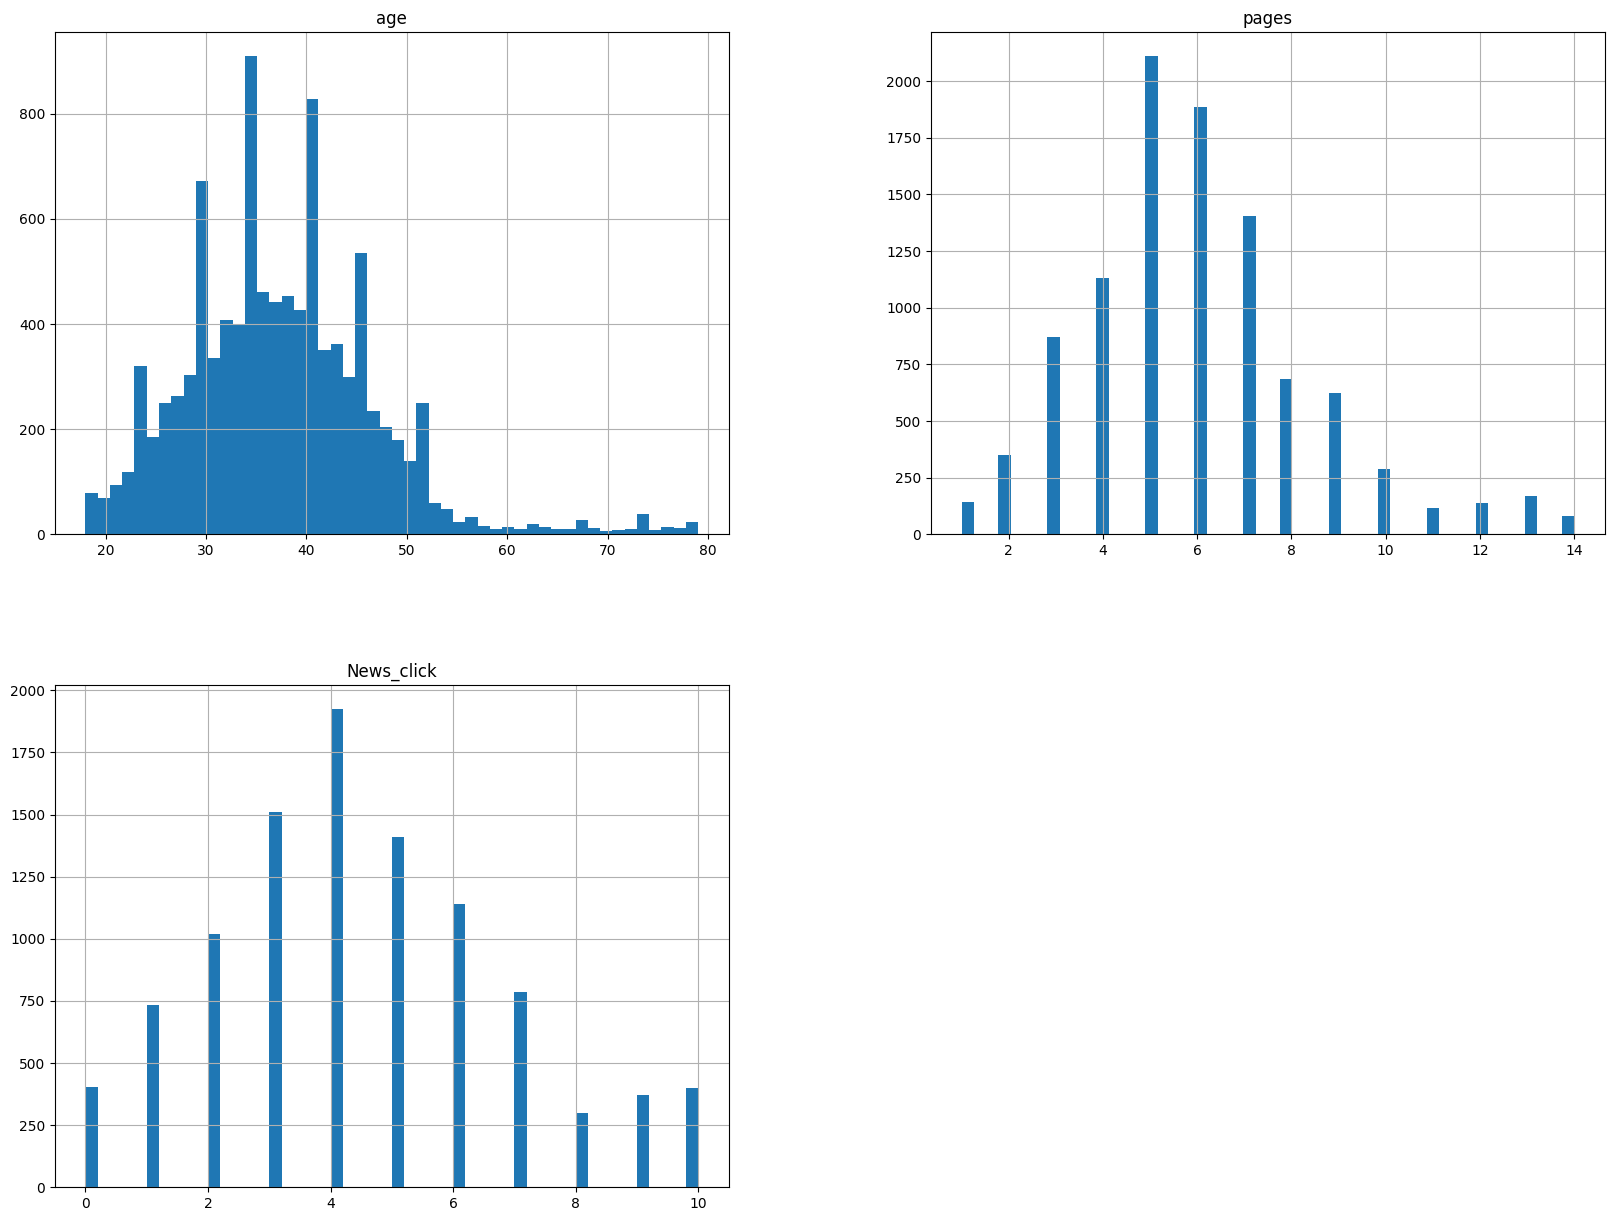

In [6]:
#Autre façon de faire le récapitulatif des variables numérique
#Utilisation des histogrammes
%matplotlib inline
import matplotlib.pyplot as plt
customer.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
#Création d'un jeu de test et entrainement
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(customer, test_size=0.2, random_state=42)

In [8]:
#Visualisation du jeu d'entrainement
train_set.head(5)

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
9254,36.0,6.0,10.0,Masc,False,3.0,Ghana,14
1561,36.0,6.0,22.0,Masc,True,4.0,Bangladesh,66
1670,38.0,3.0,44.0,Fem,False,3.0,Russia,74
6087,36.0,4.0,15.5,Masc,False,10.0,Argentina,116
6669,40.0,4.0,15.5,Fem,False,7.0,Sudan,36


In [9]:
#Visualisation du jeu de test
test_set.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
6252,54.0,3.0,15.5,Masc,False,3.0,Algeria,39
4684,37.0,5.0,102.0,Fem,True,5.0,South Africa,183
1731,43.0,7.0,28.0,Masc,True,3.0,Russia,72
4742,33.0,5.0,28.0,Fem,True,4.0,South Africa,90
4521,40.0,5.0,57.0,Masc,False,2.0,Burma,85


In [10]:
#Découvrir et visualiser les données pour mieux comprendre
#Copie du jeu d'entrainement
customer = train_set.copy()

<Axes: xlabel='age', ylabel='gender'>

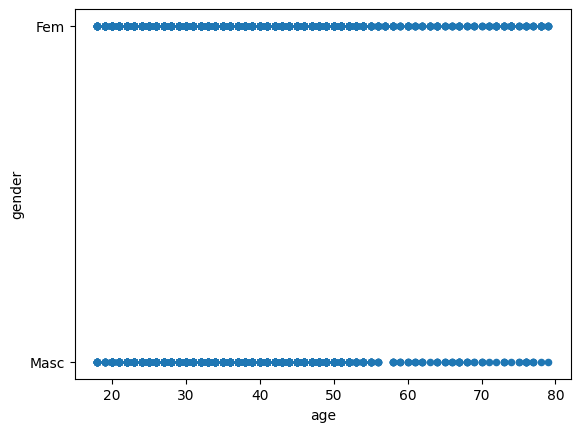

In [11]:
#Visualisation des données géographiques en fonction des genres
customer.plot(kind="scatter",x="age",y="gender")

<Axes: xlabel='age', ylabel='gender'>

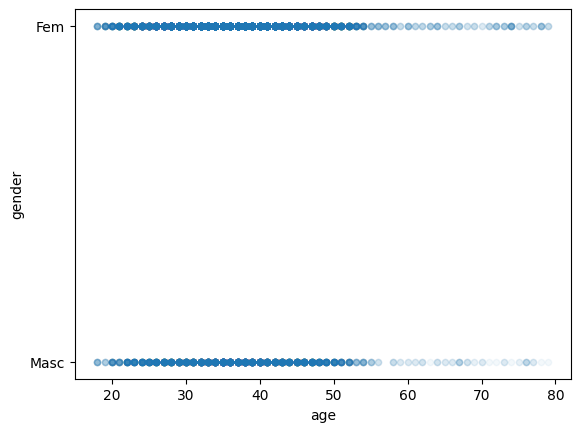

In [12]:
#Distinction des endroits où la densité est plus élevé
customer.plot(kind="scatter",x="age",y="gender",alpha=0.05)

In [13]:
#Rechercher des corrélations
corr_matrix = customer.corr(numeric_only=True)
corr_matrix

,age,pages,ReBuy,News_click
age,1.000000,0.010551,0.010644,-0.005927
pages,0.010551,1.000000,-0.017275,-0.012322
ReBuy,0.010644,-0.017275,1.000000,0.010855
News_click,-0.005927,-0.012322,0.010855,1.000000


In [14]:
#Regardons la corrélation entre chacune des variables et la valeur de l'âge
# Car la valeur que l'on recherche à prédire revenue est de type object donc 
# n'a pas été trouvé par la fonction corr()
corr_matrix['age'].sort_values(ascending=False)


age           1.000000
ReBuy         0.010644
pages         0.010551
News_click   -0.005927
Name: age, dtype: float64

In [15]:
#On ne trouve pas de corrélation forte
#On n'essaye donc pas des combinaisons de variables


In [16]:
#Préparation du jeu d'entrainement
customer_num = train_set.drop('revenue',axis=1)
customer_labels = train_set['revenue'].copy()



In [17]:
#Nettoyer les données numériques
#Enlever les données qualitatives
columns_to_drop = ["country","gender","first_item_prize","revenue"]
customer_num = customer.drop(columns_to_drop,axis=1)
customer_num

,age,pages,ReBuy,News_click
9254,36.0,6.0,False,3.0
1561,36.0,6.0,True,4.0
1670,38.0,3.0,False,3.0
6087,36.0,4.0,False,10.0
6669,40.0,4.0,False,7.0
...,...,...,...,...
5734,48.0,7.0,True,6.0
5191,25.0,10.0,False,2.0
5390,34.0,3.0,False,6.0
860,65.0,7.0,False,8.0


In [18]:
#Utiliser SimpleImputer pour remplacer les valeurs manquantes par la médiane
# PS : Même si il ne manque pas de valeur on le fait pour l'exemple
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(customer_num)

SimpleImputer(strategy='median')

In [19]:
imputer.statistics_

array([37.,  6.,  0.,  4.])

In [20]:
customer_num.median().values

array([37.,  6.,  0.,  4.])

In [21]:
X = imputer.transform(customer_num)
customer_tr = pd.DataFrame(X, columns=customer_num.columns)

In [22]:
#Utilisation de OneHotEncoder pour gérer les valeurs qualitatives
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
columns_to_select = ["first_item_prize","gender","country","revenue"]
customer = train_set.copy()
customer_cat = customer[columns_to_select]
customer_cat.head()

,first_item_prize,gender,country,revenue
9254,10.0,Masc,Ghana,14
1561,22.0,Masc,Bangladesh,66
1670,44.0,Fem,Russia,74
6087,15.5,Masc,Argentina,116
6669,15.5,Fem,Sudan,36


In [23]:
customer_cat_1hot = encoder.fit_transform(customer_cat)
customer_cat_1hot

<8000x517 sparse matrix of type '<class 'numpy.float64'>'
	with 32000 stored elements in Compressed Sparse Row format>

In [24]:
customer_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:

#3.2 - Nettoyage du DataSet Customer.csv
#3.2.1 - Remplacer les données manquantes

In [26]:
customer = pd.read_csv("Customer.csv")
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           10000 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB


In [27]:
customer.describe(include='all')

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
count,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000,10000
unique,NaN,NaN,11,2,2,NaN,50,469
top,NaN,NaN,44.0,Fem,False,NaN,China,68
freq,NaN,NaN,2083,6902,7200,NaN,200,83
mean,37.431400,5.995000,NaN,NaN,NaN,4.412000,NaN,NaN
std,9.490474,2.438559,NaN,NaN,NaN,2.418231,NaN,NaN
min,18.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,31.000000,5.000000,NaN,NaN,NaN,3.000000,NaN,NaN
50%,37.000000,6.000000,NaN,NaN,NaN,4.000000,NaN,NaN
75%,43.000000,7.000000,NaN,NaN,NaN,6.000000,NaN,NaN


In [28]:
customer['revenue'] = pd.to_numeric(customer['revenue'],errors='coerce')
# to_numeric function va transformer tous les unknown en NaN
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           9996 non-null   float64
dtypes: bool(1), float64(4), object(3)
memory usage: 556.8+ KB


In [29]:
customer.describe()

,age,pages,News_click,revenue
count,10000.000000,10000.000000,10000.000000,9996.000000
mean,37.431400,5.995000,4.412000,122.812625
std,9.490474,2.438559,2.418231,86.750910
min,18.000000,1.000000,0.000000,1.000000
25%,31.000000,5.000000,3.000000,59.000000
50%,37.000000,6.000000,4.000000,100.000000
75%,43.000000,7.000000,6.000000,164.000000
max,79.000000,14.000000,10.000000,995.000000


In [30]:
customer_nan_revenue = customer[customer['revenue'].isna()]
customer_nan_revenue
#Liste de toutes les lignes où l'on avait des unknowns

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
5,39.0,8.0,44.0,Fem,False,5.0,China,NaN
1233,18.0,11.0,10.0,Fem,False,8.0,Nigeria,NaN
2003,40.0,4.0,42.0,Masc,False,5.0,Mexico,NaN
9834,50.0,7.0,22.0,Fem,False,7.0,Taiwan,NaN


In [31]:
customer['first_item_prize'] = pd.to_numeric(customer['first_item_prize'],errors='coerce')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  9997 non-null   float64
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           9996 non-null   float64
dtypes: bool(1), float64(5), object(2)
memory usage: 556.8+ KB


In [32]:
customer.describe()

,age,pages,first_item_prize,News_click,revenue
count,10000.000000,10000.000000,9997.000000,10000.000000,9996.000000
mean,37.431400,5.995000,40.431730,4.412000,122.812625
std,9.490474,2.438559,27.556289,2.418231,86.750910
min,18.000000,1.000000,10.000000,0.000000,1.000000
25%,31.000000,5.000000,22.000000,3.000000,59.000000
50%,37.000000,6.000000,42.000000,4.000000,100.000000
75%,43.000000,7.000000,44.000000,6.000000,164.000000
max,79.000000,14.000000,117.000000,10.000000,995.000000


In [33]:
customer_nan_fip = customer[customer['first_item_prize'].isna()]
customer_nan_fip

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
2,38.0,5.0,NaN,Fem,False,7.0,China,111.0
112,38.0,5.0,NaN,Fem,False,6.0,China,95.0
6678,48.0,6.0,NaN,Fem,False,2.0,Sudan,101.0


In [34]:
#On peut donc maintenant utiliser SimpleImputer pour rajouter les données manquantes
customer_num = customer[['revenue','first_item_prize']]
customer_num.head()

,revenue,first_item_prize
0,113.0,28.0
1,36.0,15.5
2,111.0,NaN
3,71.0,44.0
4,80.0,10.0


In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(customer_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([100.,  42.])

In [37]:
customer_num.median().values

array([100.,  42.])

In [38]:
X = imputer.transform(customer_num)
customer_tr = pd.DataFrame(X, columns=customer_num.columns)
customer_tr.head()

,revenue,first_item_prize
0,113.0,28.0
1,36.0,15.5
2,111.0,42.0
3,71.0,44.0
4,80.0,10.0


In [39]:
#Les valeurs manquantes ont été corrigés
customer['revenue'] = customer_tr['revenue']
customer['first_item_prize'] = customer_tr['first_item_prize']
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  float64
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           10000 non-null  float64
dtypes: bool(1), float64(5), object(2)
memory usage: 556.8+ KB


In [40]:
customer.describe()

,age,pages,first_item_prize,News_click,revenue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.431400,5.995000,40.432200,4.412000,122.803500
std,9.490474,2.438559,27.552168,2.418231,86.734756
min,18.000000,1.000000,10.000000,0.000000,1.000000
25%,31.000000,5.000000,22.000000,3.000000,59.000000
50%,37.000000,6.000000,42.000000,4.000000,100.000000
75%,43.000000,7.000000,44.000000,6.000000,164.000000
max,79.000000,14.000000,117.000000,10.000000,995.000000


In [41]:
# On a verifié que toutes nos données ont maintenant le bon type 
# et qu'on a le nombre souahité de données
# Il est maintenant possible d'utiliser OneHotEncoder pour transformer
# les données qualitatives en nombre pour etre plus exploitables par la suite

In [42]:

# 3.2.2 - Remplacer les données aberrantes - Boite à Moustaches


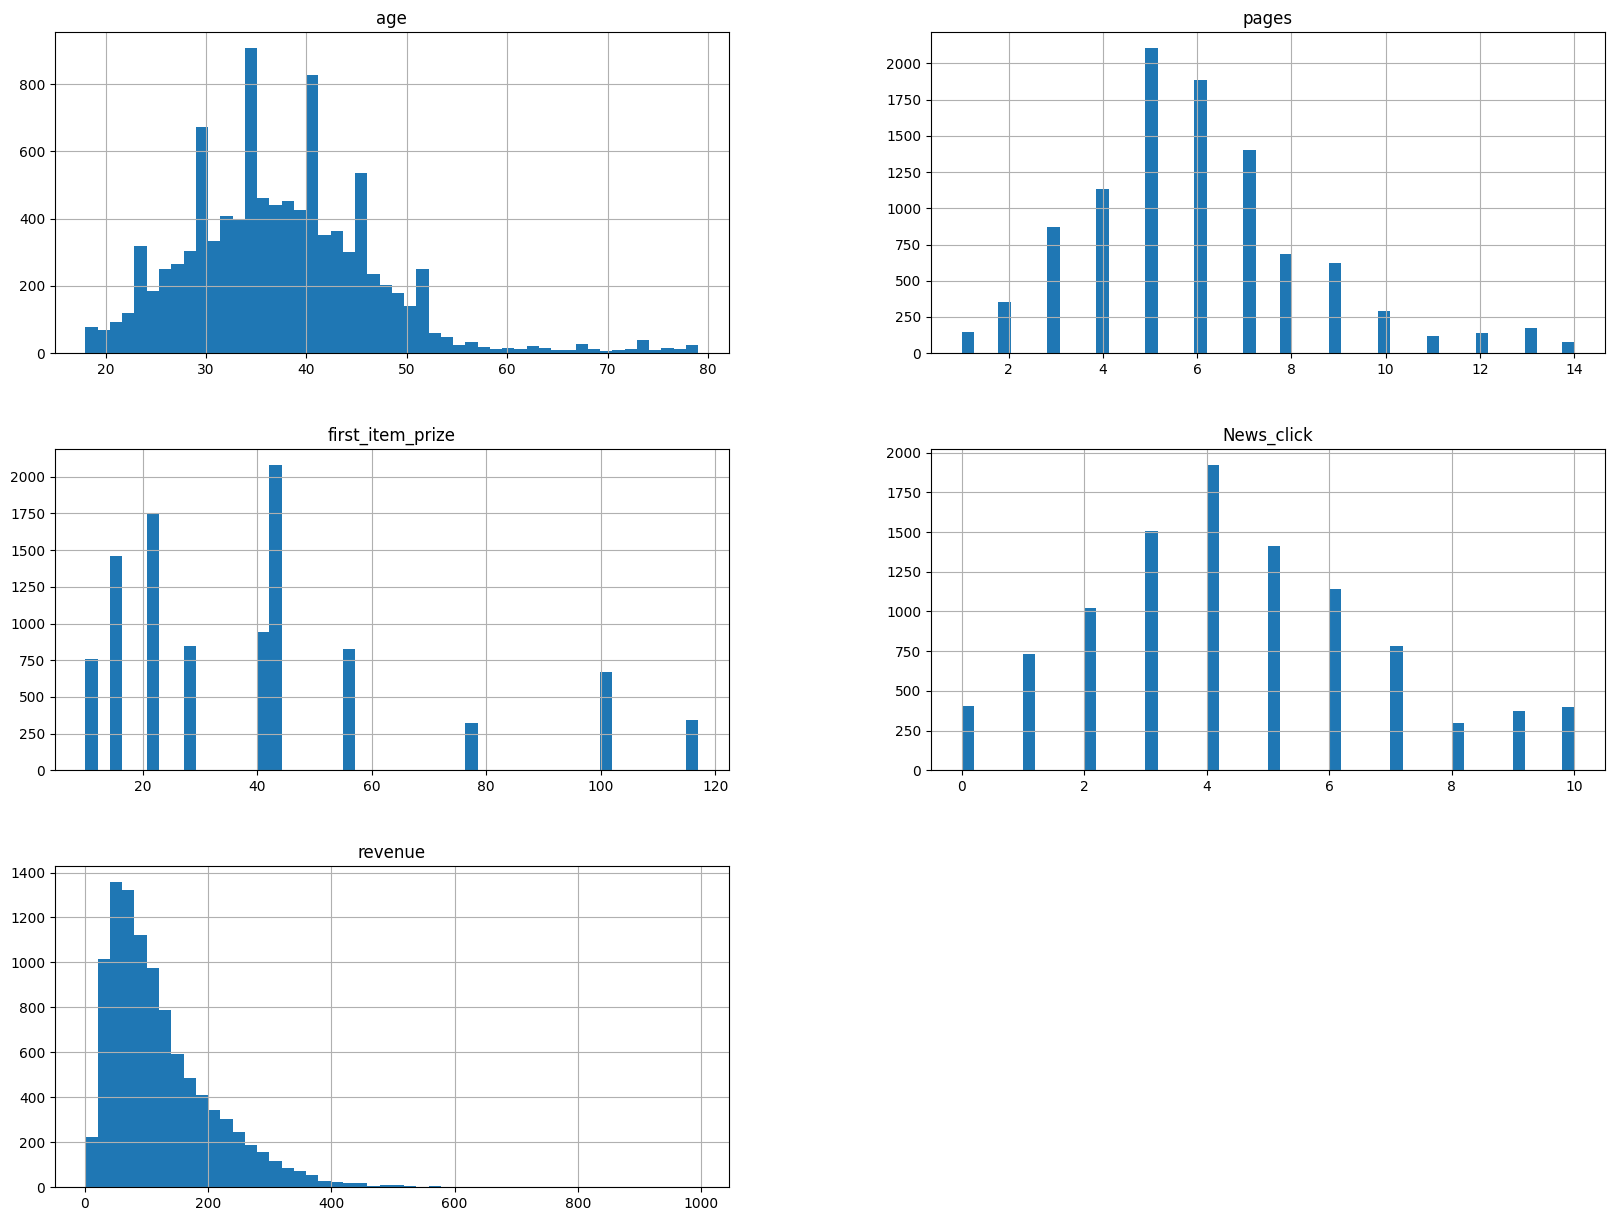

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
customer.hist(bins=50, figsize=(20,15))
plt.show()

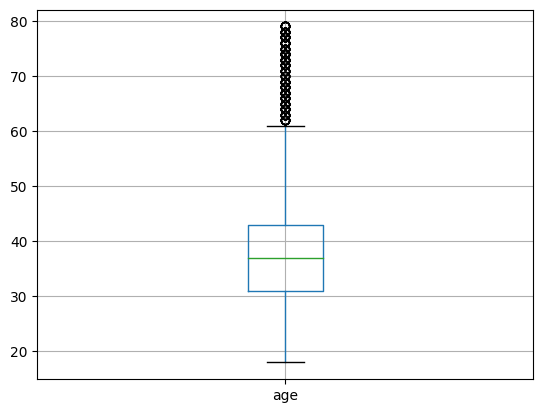

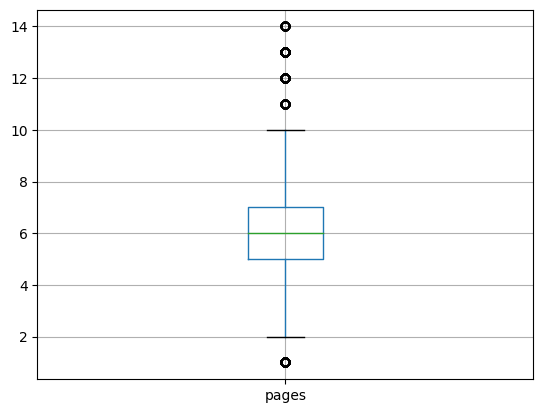

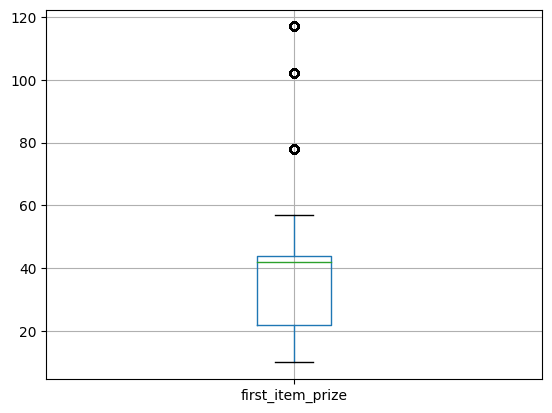

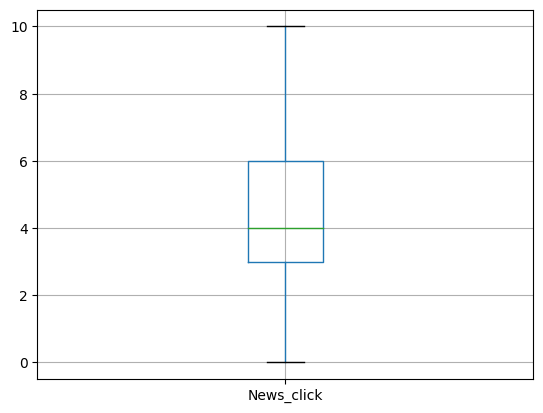

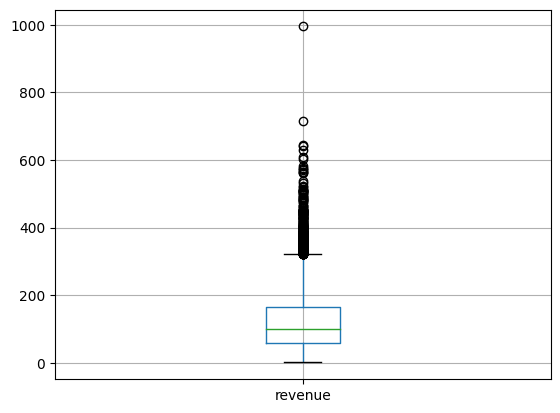

In [44]:
#Boite à Moustaches
%matplotlib inline 
import matplotlib.pyplot as plt
numeric_columns = customer.select_dtypes(include=['number']).columns
for col in numeric_columns:
    box_plots = customer.boxplot(column=[col])
    plt.show()

In [45]:
#On remarque des valeurs aberrantes
#Definition de la fonction supprimant les valeurs abberrantes

def bornage_interquartile(df,col_name,Q1=0.25,Q3=0.75):
    valeur_Q1=df[col_name].quantile(Q1)
    valeur_Q3=df[col_name].quantile(Q3)
    bsup = valeur_Q3 + 1.5*(valeur_Q3-valeur_Q1)
    binf = valeur_Q1 - 1.5*(valeur_Q3-valeur_Q1)
    print('Q1 : ',valeur_Q1,' ::: ','Q3 : ',valeur_Q3)
    print('Bornes : ',binf,' ::: ',bsup)
    df[col_name] = np.where((df[col_name] < binf) | (df[col_name] > bsup), np.nan, df[col_name])
    return df

for col in numeric_columns:
    customer = bornage_interquartile(customer,col)
    

Q1 :  31.0  :::  Q3 :  43.0
Bornes :  13.0  :::  61.0
Q1 :  5.0  :::  Q3 :  7.0
Bornes :  2.0  :::  10.0
Q1 :  22.0  :::  Q3 :  44.0
Bornes :  -11.0  :::  77.0
Q1 :  3.0  :::  Q3 :  6.0
Bornes :  -1.5  :::  10.5
Q1 :  59.0  :::  Q3 :  164.0
Bornes :  -98.5  :::  321.5


In [46]:
#Utilisons SimpleImputer pour transformer les valeurs aberrantes 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(customer[numeric_columns])

SimpleImputer(strategy='median')

In [47]:

X_num = imputer.transform(customer[numeric_columns])
df_num = pd.DataFrame(X_num, columns=numeric_columns)
customer[numeric_columns]

,age,pages,first_item_prize,News_click,revenue
0,41.0,6.0,28.0,4.0,113.0
1,34.0,4.0,15.5,2.0,36.0
2,38.0,5.0,42.0,7.0,111.0
3,20.0,NaN,44.0,2.0,71.0
4,39.0,10.0,10.0,4.0,80.0
...,...,...,...,...,...
9995,49.0,8.0,44.0,4.0,254.0
9996,32.0,5.0,42.0,1.0,82.0
9997,47.0,8.0,15.5,3.0,117.0
9998,42.0,7.0,42.0,2.0,70.0


In [48]:
customer[numeric_columns] = df_num
customer[numeric_columns]

,age,pages,first_item_prize,News_click,revenue
0,41.0,6.0,28.0,4.0,113.0
1,34.0,4.0,15.5,2.0,36.0
2,38.0,5.0,42.0,7.0,111.0
3,20.0,6.0,44.0,2.0,71.0
4,39.0,10.0,10.0,4.0,80.0
...,...,...,...,...,...
9995,49.0,8.0,44.0,4.0,254.0
9996,32.0,5.0,42.0,1.0,82.0
9997,47.0,8.0,15.5,3.0,117.0
9998,42.0,7.0,42.0,2.0,70.0


In [49]:
# On remarque que notre dataset ne contient plus de bruits pour les valeurs numériques 
# Nous avons remplacés les valeurs bruitées par la moyenne respective de chaque variable


In [50]:
# 3.3 - Enrichissements des données

country_gdp = pd.read_csv('CountryGDP.csv')
country_pop = pd.read_csv('CountryPopulation.csv')

country_gdp.head()

,Country,GDP_inhab
0,Qatar,100889
1,Luxembourg,77958
2,Singapore,60799
3,Norway,54397
4,Brunei,54114


In [51]:
country_pop.head()

,Country,population
0,China,1360720000
1,India,1241100000
2,United States,317638000
3,Indonesia,249866000
4,Brazil,201032714


In [52]:
country_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    188 non-null    object
 1   GDP_inhab  188 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [53]:
country_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     220 non-null    object
 1   population  220 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [54]:
# On ne remarque pas d'anomalies dans les données donc on ne les transforme pas 

In [55]:
# Utilisation de le fonction Merge pour fusionner customer et coutryPopulation et CountryGDP

#Premiere étape : renommer les colonnes pour pouvoir merge sur la même key
country_gdp = country_gdp.rename(columns={'Country': 'country'})
country_pop = country_pop.rename(columns={'Country': 'country'})

country_pop


,country,population
0,China,1360720000
1,India,1241100000
2,United States,317638000
3,Indonesia,249866000
4,Brazil,201032714
...,...,...
215,Sint Maarten (Netherlands),37429
216,Saint Martin (France),36979
217,Liechtenstein,36942
218,Monaco,36136


In [56]:
#Fonction pour merge les datasets
def mergeDF(merge_GDP=True):
    merged_df = pd.merge(customer,country_pop,on='country')
    if(merge_GDP):
        merged_df=pd.merge(merged_df,country_gdp,on='country')
    return merged_df
merged_df = mergeDF()

#Résultat du dataset fusionné
merged_df

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue,population,GDP_inhab
0,41.0,6.0,28.0,Fem,False,4.0,China,113.0,1360720000,9055
1,34.0,4.0,15.5,Fem,True,2.0,China,36.0,1360720000,9055
2,38.0,5.0,42.0,Fem,False,7.0,China,111.0,1360720000,9055
3,20.0,6.0,44.0,Fem,False,2.0,China,71.0,1360720000,9055
4,39.0,10.0,10.0,Fem,True,4.0,China,80.0,1360720000,9055
...,...,...,...,...,...,...,...,...,...,...
9995,49.0,8.0,44.0,Masc,False,4.0,Taiwan,254.0,23377515,38400
9996,32.0,5.0,42.0,Masc,False,1.0,Taiwan,82.0,23377515,38400
9997,47.0,8.0,15.5,Fem,True,3.0,Taiwan,117.0,23377515,38400
9998,42.0,7.0,42.0,Fem,False,2.0,Taiwan,70.0,23377515,38400
